In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc2


## Steps
1. Read in, Check data input
    - setup file path/data source read in
    - check dims
    - plot images
    - preprocess if necessary
2. Assemble model
    - build layers
    - Compile model
3. Train model
    - fit model
    - evaluate accuracy
4. Setup as predictor

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [10]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape, len(test_images)

((10000, 28, 28), 10000)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
train_images[0].shape

(28, 28)

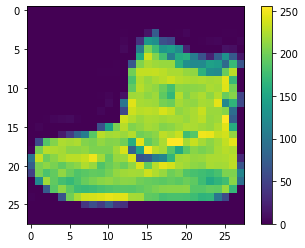

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255
test_images = test_images / 255

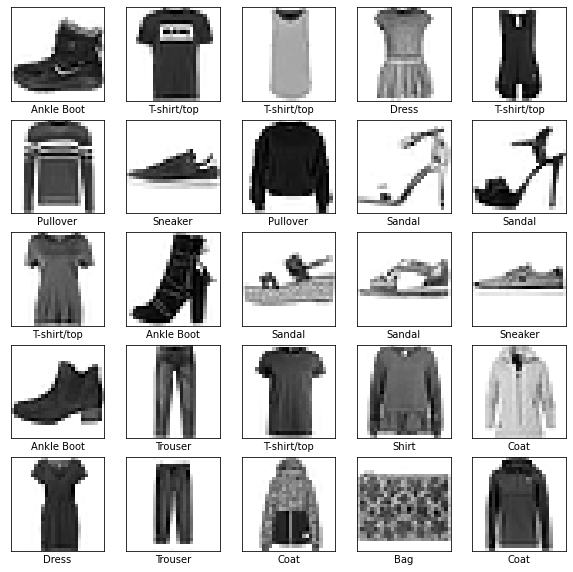

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
model = keras.Sequential([
    # Flatten unstacks 2d array to 1d array
    keras.layers.Flatten(input_shape=(28, 28)),
    # Dense layers are fully connected layers
    keras.layers.Dense(128, activation='relu'),
    # Last layer has 10 nodes corresponding to 10 elem array returned corresponding to 10 possible outputs
    keras.layers.Dense(10)
])

In [30]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1310 - accuracy: 0.6524
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6580 - accuracy: 0.7646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5766 - accuracy: 0.7919
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5332 - accuracy: 0.8094
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5036 - accuracy: 0.8210
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4834 - accuracy: 0.8291
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4668 - accuracy: 0.8348
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8393
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4437 - accuracy: 0.8436
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.434

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - loss: 0.4646 - accuracy: 0.8295
0.8295000195503235


To verify predictions, we use model to predict images. The model outputs logits so we create a new tf-model with trained model and a soft-max layer to convert logits to probabilities

In [36]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

In [41]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)